In [ ]:
# Created by Krish Chopra - April 19, 2021

# The following ML model will, given a data set of patients' characteristics, determine whether a person has cardiovascular disease.
# The dataset used to train the model can be found at https://archive.ics.uci.edu/ml/datasets/heart+disease

In [ ]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
# Load the patients dataset
df = pd.read_csv('Heart_Disease_Patient_Dataset.csv')

In [ ]:
# Print the first 20 rows to check if dataset is properly loaded
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
# Shift the target variable to be the first column, and rename it to 'diagnosis'
target_col = df.pop("target")
df.insert(0, "diagnosis", target_col)

# Rename many of the other column names to make them more descriptive
df.columns = ['diagnosis', 'age', 'sex', 'chest_pain', 'resting_bp', 'cholesterol', 'blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak_ST', 'slope_ST', 'num_of_blood_vessels', 'thal_stress_test']

In [ ]:
# Meanings of the column names

# diagnosis: Whether or not the patient has heart disease (0 = no, 1 = yes)
# age: The patient's age in years
# sex: The patient's biological sex (0 = female, 1 = male)
# chest_pain: The type of chest pain (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
# resting_bp: The patient's resting blood pressure (in mm Hg, upon admission to hospital)
# cholesterol: The patient's serum cholesterol measurement in mg/dL
# blood_sugar: The patient's fasting blood sugar (> 120 mg/dL, 1 = true; 0 = false)
# resting_ecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
# max_heart_rate: The patient's maximum heart rate reached
# exercise_angina: Exercise-induced angina (0 = no, 1 = yes)
# oldpeak_ST: ST depression induced by exercise relative to rest ('ST' is a segment of the ECG plot)
# slope_ST: The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
# num_of_blood_vessels: The number of major blood vessels (0 - 4)
# thal_stress_test: Results of thallium stress test (1 = normal, 2 = fixed defect, 3 = reversible defect)

In [ ]:
# Presents us with the number of distinct values for each variable
df.nunique(axis=0)

diagnosis                 2
age                      41
sex                       2
chest_pain                4
resting_bp               49
cholesterol             152
blood_sugar               2
resting_ecg               3
max_heart_rate           91
exercise_angina           2
oldpeak_ST               40
slope_ST                  3
num_of_blood_vessels      5
thal_stress_test          4
dtype: int64

In [ ]:
# Count how many rows & columns there are in the dataset; this corresponds to the number of patients and metrics for each
df.shape

(303, 14)

In [ ]:
# Count how many empty/null values are in the dataset
df.isna().sum()

diagnosis               0
age                     0
sex                     0
chest_pain              0
resting_bp              0
cholesterol             0
blood_sugar             0
resting_ecg             0
max_heart_rate          0
exercise_angina         0
oldpeak_ST              0
slope_ST                0
num_of_blood_vessels    0
thal_stress_test        0
dtype: int64

In [ ]:
df.dtypes

diagnosis                 int64
age                       int64
sex                       int64
chest_pain                int64
resting_bp                int64
cholesterol               int64
blood_sugar               int64
resting_ecg               int64
max_heart_rate            int64
exercise_angina           int64
oldpeak_ST              float64
slope_ST                  int64
num_of_blood_vessels      int64
thal_stress_test          int64
dtype: object

In [ ]:
# Count of number of patients with and without heart disease
df['diagnosis'].value_counts()

1    165
0    138
Name: diagnosis, dtype: int64

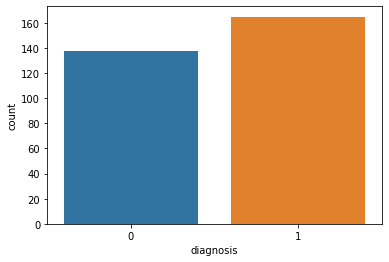

In [ ]:
# Visualize heart disease count
sns.countplot(x=df['diagnosis'])

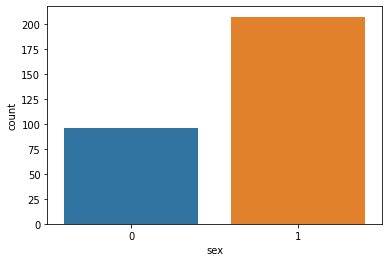

In [ ]:
# Visualize count of men and women in the dataset
sns.countplot(x=df['sex'])

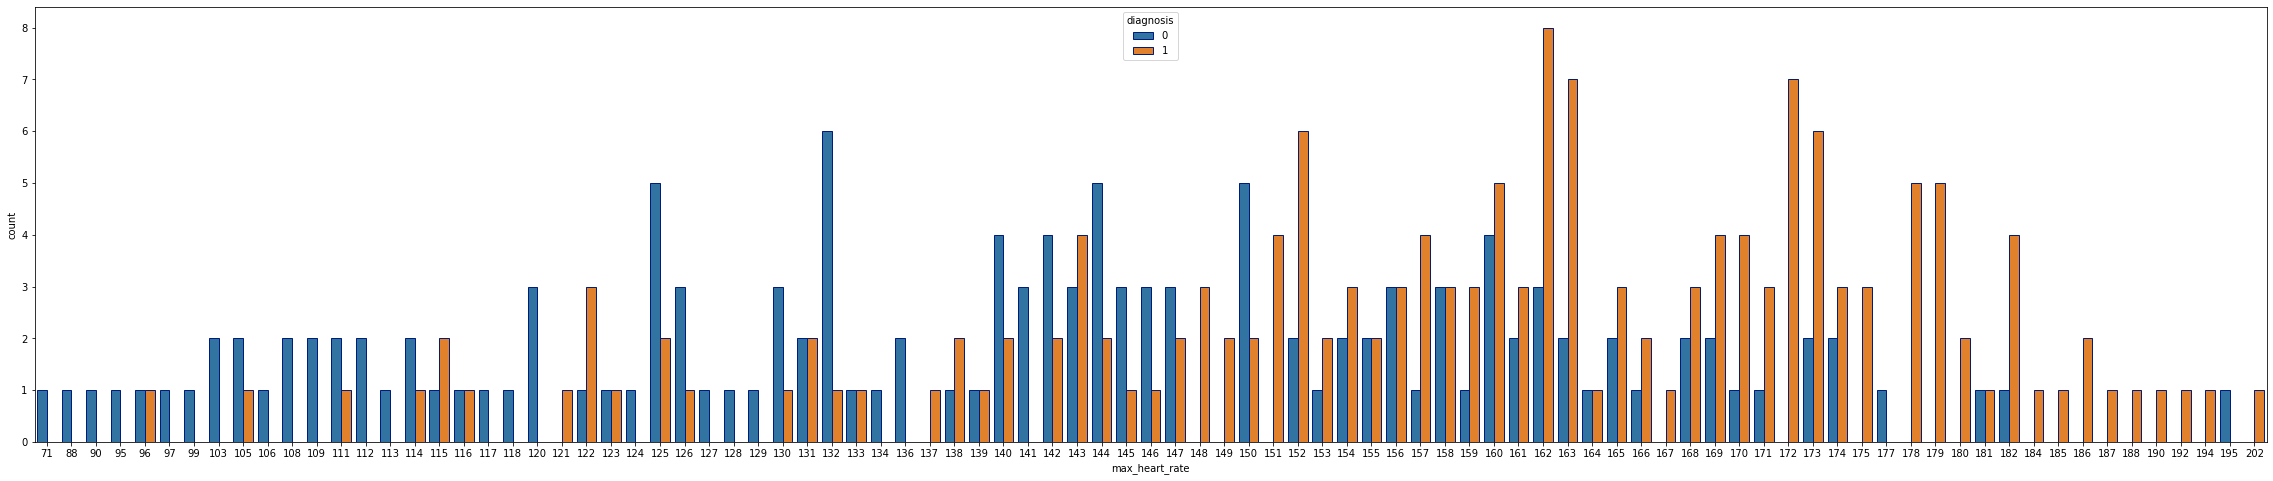

In [ ]:
# Visualize the prevalence of heart disease in relation to the maximum heart rate of patients
plt.subplots(figsize = (40, 8))
sns.countplot(x='max_heart_rate', hue='diagnosis', data=df, edgecolor=sns.color_palette('dark', n_colors=1))

In [ ]:
# Finds correlations in the dataset
df.corr()

,diagnosis,age,sex,chest_pain,resting_bp,cholesterol,blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak_ST,slope_ST,num_of_blood_vessels,thal_stress_test
diagnosis,1.000000,-0.225439,-0.280937,0.433798,-0.144931,-0.085239,-0.028046,0.137230,0.421741,-0.436757,-0.430696,0.345877,-0.391724,-0.344029
age,-0.225439,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
sex,-0.280937,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
chest_pain,0.433798,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
resting_bp,-0.144931,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
cholesterol,-0.085239,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
blood_sugar,-0.028046,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
resting_ecg,0.137230,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
max_heart_rate,0.421741,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exercise_angina,-0.436757,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754


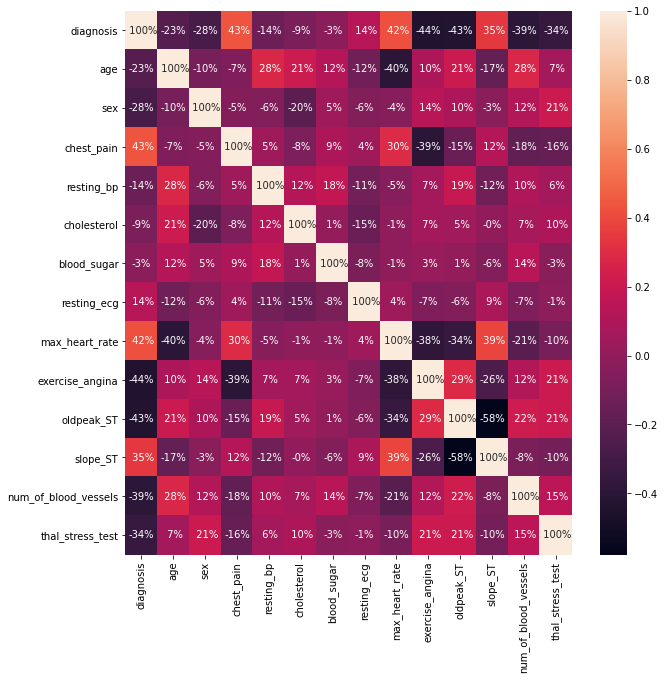

In [ ]:
# Visualize the correlations in the data
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=' .0%')

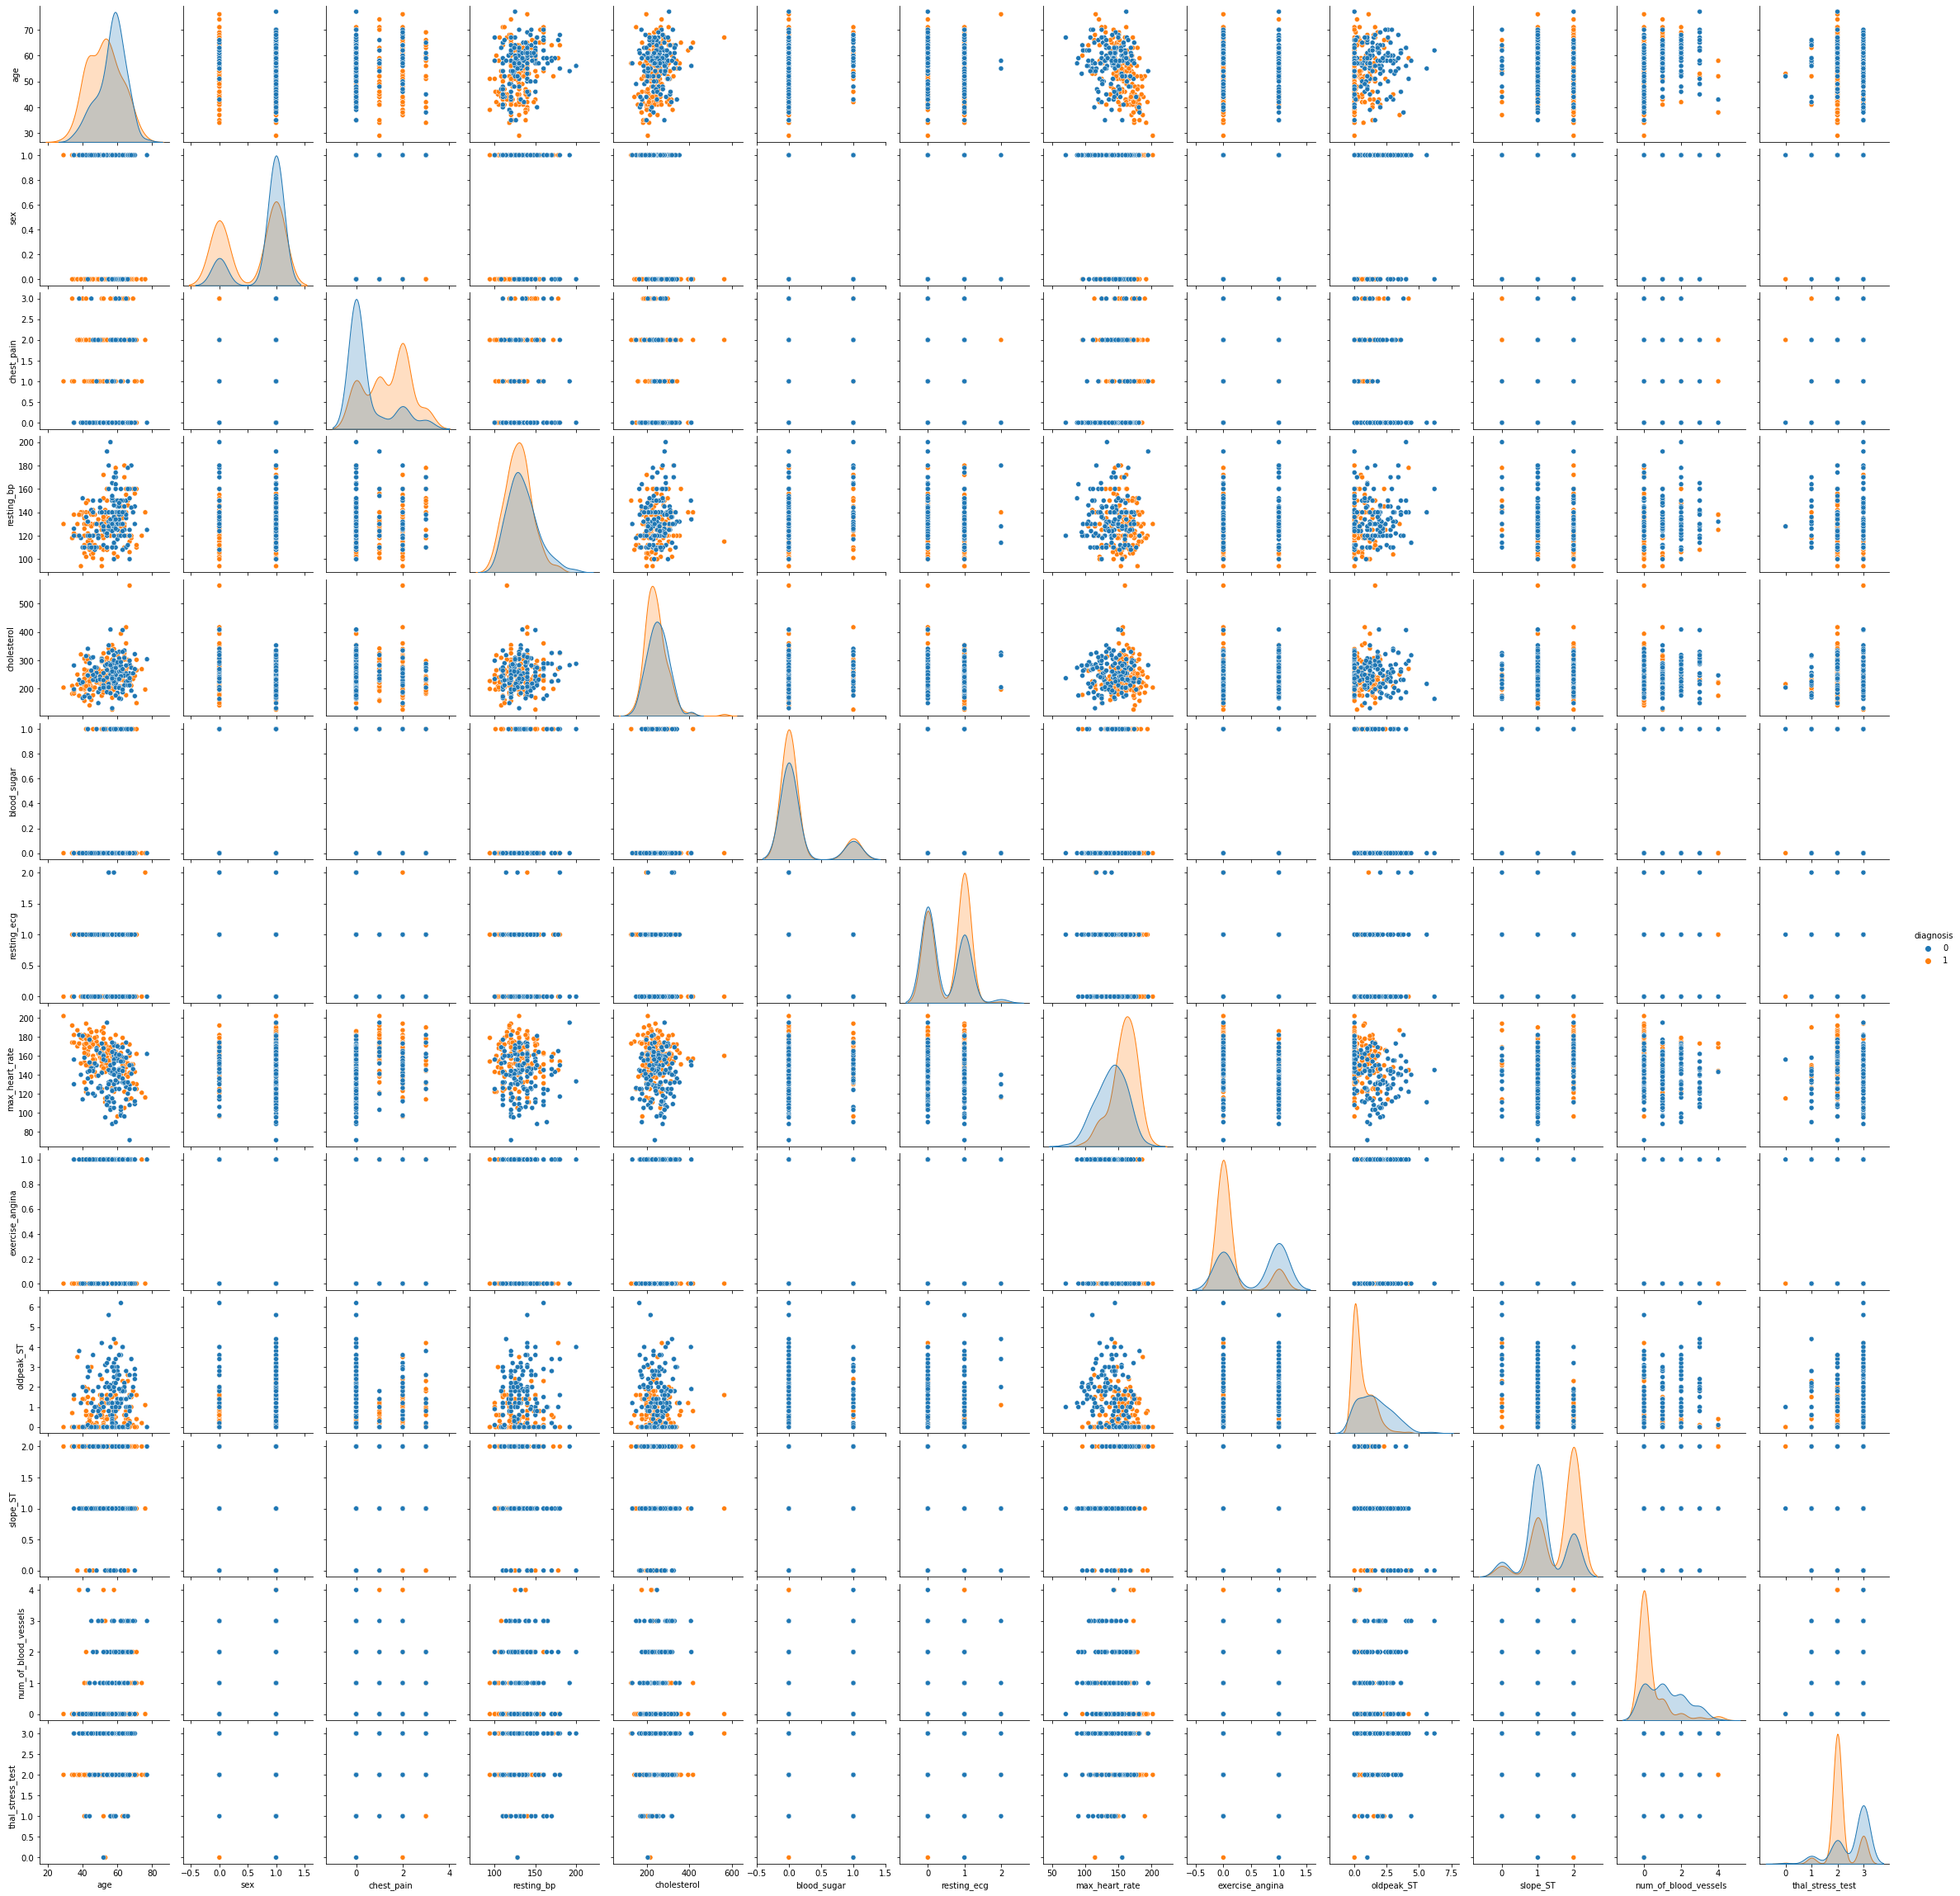

In [ ]:
# Creates a pair plot for all the columns of the dataset
sns.pairplot(df, hue="diagnosis")

In [ ]:
# Randomly divide the dataset into 20% testing and 80% training data
from sklearn.model_selection import train_test_split

X = df.drop(columns=['diagnosis']).to_numpy()
y = df['diagnosis'].to_numpy()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Scale the data (perform standardization feature scaling)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# Train 3 different machine learning models with the training data, to see which one works best

# Import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_regression = LogisticRegression(random_state = 0)
log_regression.fit(X_train, y_train)

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree.fit(X_train, y_train)

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)

# Print the accuracy of the models on the training data
print("Logistic Regression Training Accuracy:", log_regression.score(X_train, y_train))
print("Decision Tree Classifier Training Accuracy:", decision_tree.score(X_train, y_train))
print("Random Forest Classifier Training Accuracy:", random_forest.score(X_train, y_train))

Logistic Regression Training Accuracy: 0.8429752066115702
Decision Tree Classifier Training Accuracy: 1.0
Random Forest Classifier Training Accuracy: 1.0


In [ ]:
# Test model accuracy on testing data via confusion matrix
from sklearn.metrics import confusion_matrix
models = [log_regression, decision_tree, random_forest]

for i in range(len(models)):

  if i == 0:
    print("Logistic Regression")
  elif i == 1:
    print("Decision Tree Classifier")
  else:
    print("Random Forest Classifier")
  
  cm = confusion_matrix(y_test, models[i].predict(X_test))

  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy =', (TP + TN) / (TP + TN + FN + FP))
  print()

Logistic Regression
[[21  6]
 [ 3 31]]
Testing Accuracy = 0.8524590163934426

Decision Tree Classifier
[[21  6]
 [ 6 28]]
Testing Accuracy = 0.8032786885245902

Random Forest Classifier
[[24  3]
 [ 4 30]]
Testing Accuracy = 0.8852459016393442



In [ ]:
# Show more detailed metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(models)):

  if i == 0:
    print("Logistic Regression\n")
  elif i == 1:
    print("Decision Tree Classifier\n")
  else:
    print("Random Forest Classifier\n")

  accuracy = accuracy_score(y_test, models[i].predict(X_test))

  print(classification_report(y_test, models[i].predict(X_test)))
  print("Accuracy:", str(round(accuracy * 100, 2)) + "%")
  print()
  print()

Logistic Regression

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy: 85.25%


Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.82      0.82      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

Accuracy: 80.33%


Random Forest Classifier

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg     

In [ ]:
# The Random Forest Classifier seems to be the most accurate, with an overall testing accuracy rate of around 89%!
# 89% accuracy is pretty good, but when human lives are at stake, it's important to try and get this number as close to 100% as possible
# In future models, I aim to improve upon accuracy by employing better feature selection, model parameter tuning, and working with a larger dataset

In [ ]:
# Print the predictions that the Random Forest Classifier Model made, as well as the actual data, to see specifically where it went wrong
print("Predictions for testing data:\n", random_forest.predict(X_test))
print()
print("Actual results for testing data:\n", y_test)

Predictions for testing data:
 [0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]

Actual results for testing data:
 [0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1]
